This notebook illustrates the basic usage of ThermoLIB to construct a 1D free energy profile from umbrella sampling simulations using the WHAM methodology, including error estimation from the theory of the maximum likelihood estimator (MLE).

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from thermolib.thermodynamics.fep import BaseFreeEnergyProfile, SimpleFreeEnergyProfile
from thermolib.thermodynamics.histogram import Histogram1D
from thermolib.tools import read_wham_input, decorrelate
from thermolib.thermodynamics.trajectory import ColVarReader
from thermolib.units import *

import numpy as np

Define some file/path variables

In [3]:
#location of the plumed metadata file containing all information of the umbrella sampling
set = 'full_dataset' #chose from 200, 400, 800, full_dataset
fn_meta = 'data/isobutene_link/transferMACE/LDA/full_reaction/623K/%s/nc16_ew200_bs16_nrb10_maxL2_corr3/wd0e+00_dmlp1616_bs16/trajectories/wham_input.txt' %set

# WHAM application with error bar

In [4]:
colvar_reader = ColVarReader([0], units=['au'], verbose=True, start=1000)
temp, biasses, trajectories = read_wham_input(
    fn_meta, colvar_reader, 'COLVAR_%s.dat', 
    bias_potential='Parabola1D', q01_unit='au', kappa1_unit='kjmol',
    verbose=True
)

Temperature set at 623.000000
Read 9000 trajectory samples for 1 CVs from data/isobutene_link/transferMACE/LDA/full_reaction/623K/full_dataset/nc16_ew200_bs16_nrb10_maxL2_corr3/wd0e+00_dmlp1616_bs16/trajectories/COLVAR_u0.dat
Added bias Parabola1D (u0): K=3500 kjmol  q0=2.300e+00 au
Read 9000 trajectory samples for 1 CVs from data/isobutene_link/transferMACE/LDA/full_reaction/623K/full_dataset/nc16_ew200_bs16_nrb10_maxL2_corr3/wd0e+00_dmlp1616_bs16/trajectories/COLVAR_u1.dat
Added bias Parabola1D (u1): K=3500 kjmol  q0=2.325e+00 au
Read 9000 trajectory samples for 1 CVs from data/isobutene_link/transferMACE/LDA/full_reaction/623K/full_dataset/nc16_ew200_bs16_nrb10_maxL2_corr3/wd0e+00_dmlp1616_bs16/trajectories/COLVAR_u2.dat
Added bias Parabola1D (u2): K=3500 kjmol  q0=2.350e+00 au
Read 9000 trajectory samples for 1 CVs from data/isobutene_link/transferMACE/LDA/full_reaction/623K/full_dataset/nc16_ew200_bs16_nrb10_maxL2_corr3/wd0e+00_dmlp1616_bs16/trajectories/COLVAR_u3.dat
Added bias P

<Figure size 432x288 with 0 Axes>

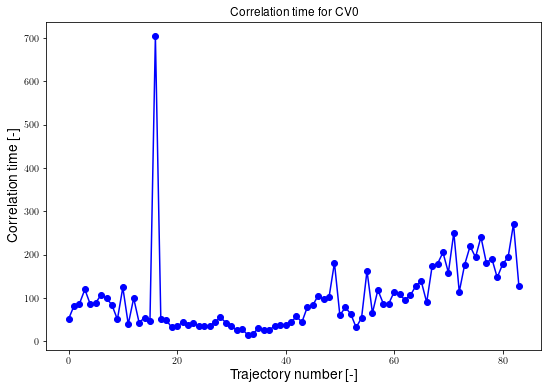

In [5]:
corrtimes = decorrelate(trajectories, plot=True)

In [21]:
bins = np.linspace(2.3, 4.6, 100)
hist = Histogram1D.from_wham(bins, trajectories, biasses, temp, Nscf=5000, error_estimate='mle_f_cov', corrtimes=corrtimes, verbosity='medium')

Initialization ...
Constructing individual histograms for each biased simulation ...
Computing bias on grid ...
Solving WHAM equations (SCF loop) ...
SCF Converged!
Estimating error ...
  defining zero-mask ...
    deactivated 3 bins
    deactivated 0 sims
  applying zero-mask ...
  inverting Fisher matrix ...
---------------------------------------------------------------------
TIMING SUMMARY
  initializing: 00h 00m 00.001s
  histograms  : 00h 00m 00.047s
  bias poten. : 00h 00m 00.016s
  solve scf   : 00h 00m 00.223s
  error est.  : 00h 00m 00.011s
  TOTAL       : 00h 00m 00.299s
---------------------------------------------------------------------


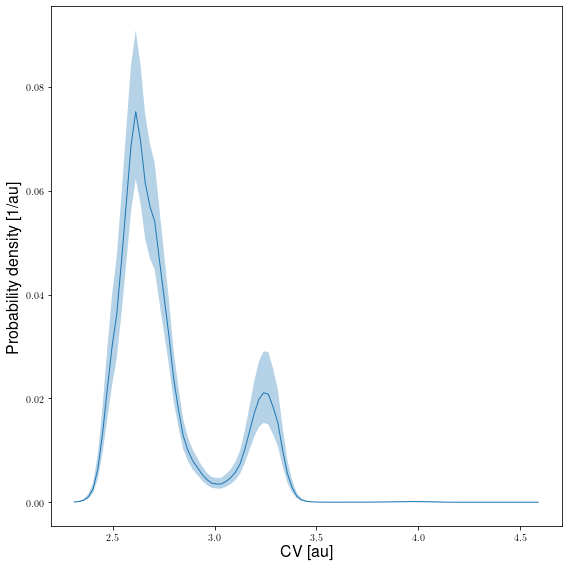

In [22]:
hist.plot()

We can now plot the histogram and/or the free energy profile together with its error bar as well as 5 random samples of the FEP within the error bar.

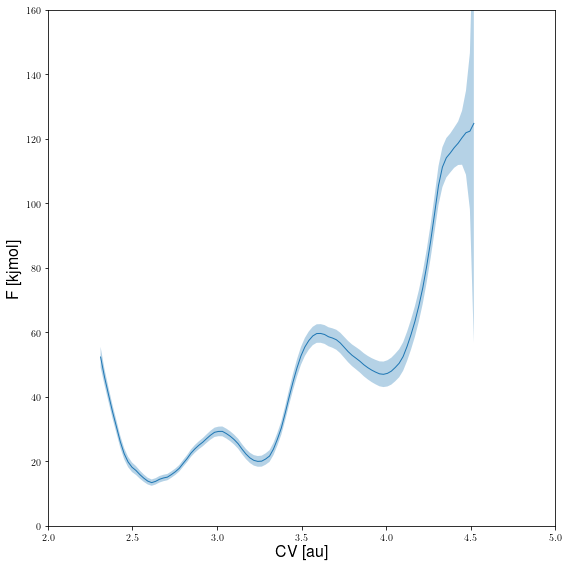

In [23]:
fep = BaseFreeEnergyProfile.from_histogram(hist, temp=temp)
fep.plot(cvlims=[2.0,5.0], flims=[0,160])

One can also plot various samples of the full profile taken according the error estimate:

Finally, we can also make a matrix plot of the correlation between the free energy of different points on the fep:

<Figure size 432x288 with 0 Axes>

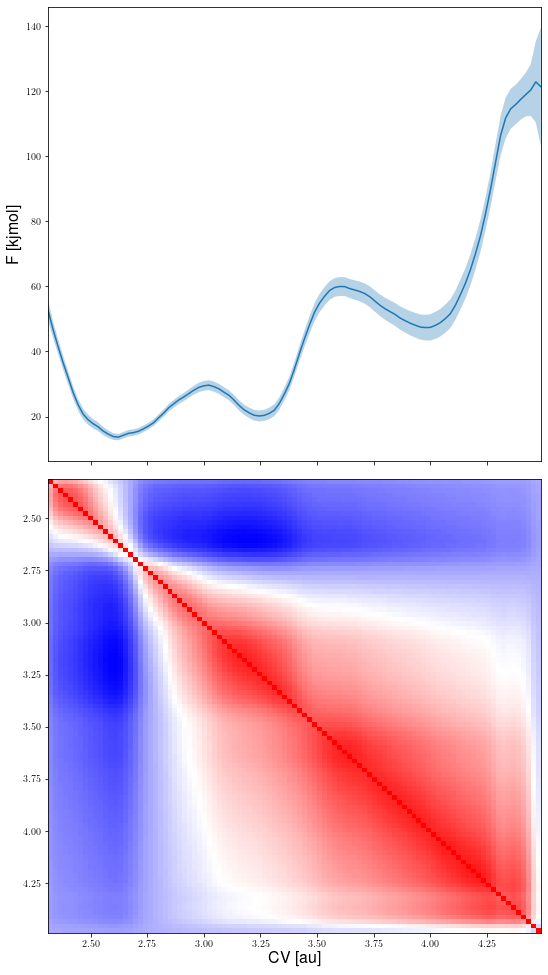

In [9]:
fep.plot_corr_matrix()